<a href="https://colab.research.google.com/github/sarudalf3/DataScienceUDD/blob/main/SL10_Ejercicio_SVMMka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aprendizaje supervisado**
# SL010. Ejercicio SVM

# Sección nueva

Descargar el dataset ''Adult'' [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Adult). Leer la documentacion del conjunto de datos para definir la tarea a realizar. 

Entrene un modelo de SVM, con 5 fold cross validation y encuentre con GridSearch el conjunto de parametros que maximicen el indice F1. Reporte la matriz de confusion, F1, Recall, Precision y Accuracy.

<font color = "Red"> La tarea de predicción en este caso, es determinar si una persona gana más de 50K al año

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from urllib.request import urlopen
%matplotlib inline
import sklearn.preprocessing as preprocessing

In [2]:
#explicación de los datos
path_names = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names"

lines = urlopen(path_names).read().decode('utf-8').split('\n')
for line in lines:
    print(line)

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [3]:
train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'            
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

In [4]:
features_names = ['Age','Workclass','Fnlwgt','Education','Education-Num','Martial Status','Occupation','Relationship','Race',
            'Sex','Capital Gain','Capital Loss','Hours per week','Country','Target'] 

#Read train data
train = pd.read_csv(train_url, names=features_names, sep=r'\s*,\s*', engine='python', na_values="?")
print(train.shape)
train.loc[:,'train'] = 1
train.head(5)

(32561, 15)


,Age,Workclass,Fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target,train
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1


In [5]:
test = pd.read_csv(test_url, names=features_names, sep=r'\s*,\s*', engine='python', na_values="?", skiprows=1)
print(test.shape)
test.loc[:,'train'] = 0
test.head(5)

(16281, 15)


,Age,Workclass,Fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target,train
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,0
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.,0


In [6]:
##Se concatena la data de test y entrenamiento.
original = pd.concat([train, test])

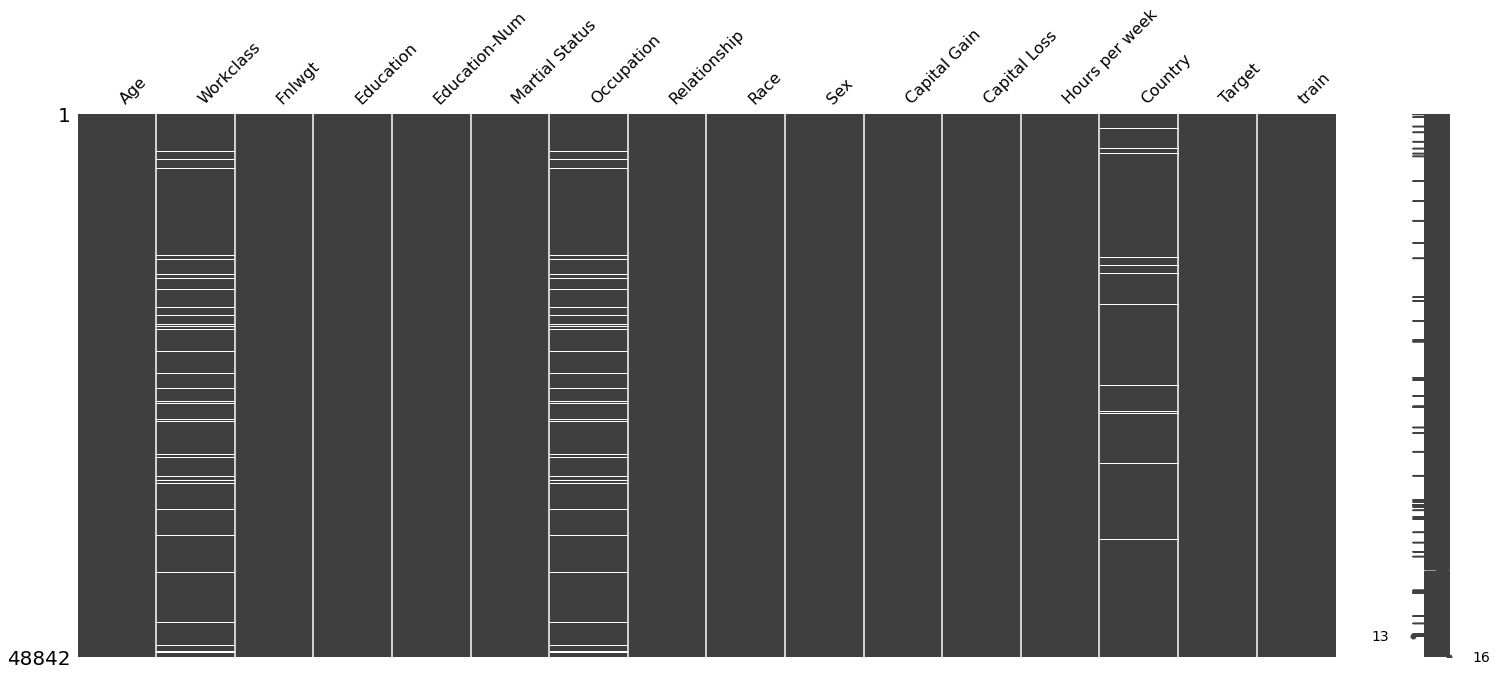

In [7]:
import missingno as msno
%matplotlib inline
## Se genera grafico para visualizar el estado de la data.
msno.matrix(original)
plt.show()

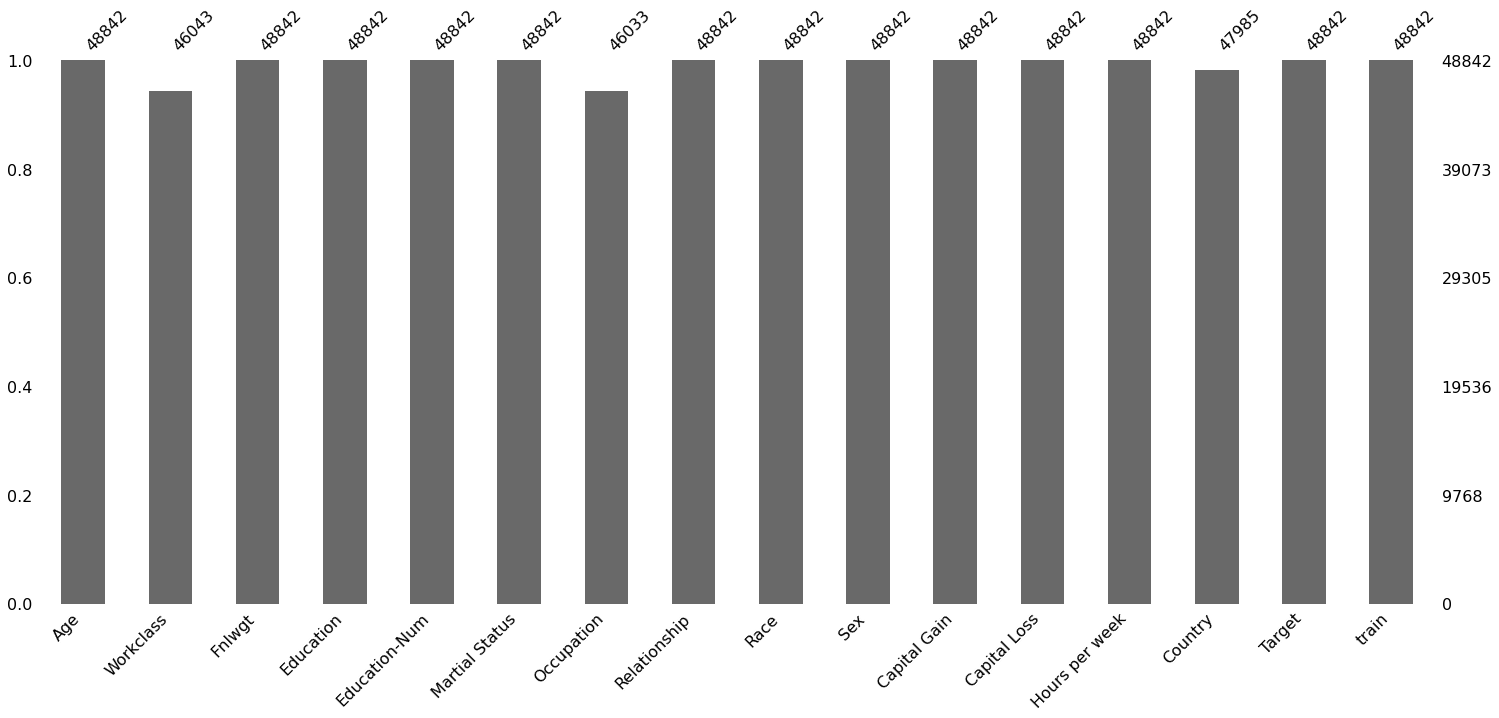

In [8]:
msno.bar(original)
plt.show()

In [9]:
##Se cuentan los valores Null
null_counts = original.isnull().sum()
print(null_counts)

Age                  0
Workclass         2799
Fnlwgt               0
Education            0
Education-Num        0
Martial Status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per week       0
Country            857
Target               0
train                0
dtype: int64


In [10]:
df = original.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             45222 non-null  int64 
 1   Workclass       45222 non-null  object
 2   Fnlwgt          45222 non-null  int64 
 3   Education       45222 non-null  object
 4   Education-Num   45222 non-null  int64 
 5   Martial Status  45222 non-null  object
 6   Occupation      45222 non-null  object
 7   Relationship    45222 non-null  object
 8   Race            45222 non-null  object
 9   Sex             45222 non-null  object
 10  Capital Gain    45222 non-null  int64 
 11  Capital Loss    45222 non-null  int64 
 12  Hours per week  45222 non-null  int64 
 13  Country         45222 non-null  object
 14  Target          45222 non-null  object
 15  train           45222 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 5.9+ MB


Caterorical Analysis

In [11]:
#Worldclass
df['Workclass'].value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: Workclass, dtype: int64

In [12]:
#Education
df['Education'].value_counts()

HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: Education, dtype: int64

In [13]:
#create a column with without grade
dic_Ed = {'Education':{'11th':'Non-grad','10th':'Non-grad','7th-8th':'Non-grad','9th':'Non-grad','12th':'Non-grad',
                       '5th-6th':'Non-grad','1st-4th':'Non-grad','Preschool':'Non-grad','HS-grad':'HS-grad',
                       'Some-college':'Some-college','Bachelors':'Bachelors','Non-grad':'Non-grad',
                        'Masters':'Masters','Assoc-voc':'Assoc-voc','Assoc-acdm':'Assoc-acdm','Prof-school':'Prof-school','Doctorate':'Doctorate'}}
df = df.replace(dic_Ed) 
df['Education'].value_counts()

HS-grad         14783
Some-college     9899
Bachelors        7570
Non-grad         5661
Masters          2514
Assoc-voc        1959
Assoc-acdm       1507
Prof-school       785
Doctorate         544
Name: Education, dtype: int64

In [14]:
#Countries, solo se deja si es de EEUU, sino se marca con Non US
other_countries = df['Country'].value_counts().index[1:]
df = df.replace(other_countries, 'Non US')
df['Country'].value_counts()

United-States    41292
Non US            3930
Name: Country, dtype: int64

In [15]:
## Valida que estados civiles existen en la BD
df['Martial Status'].value_counts()

Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: Martial Status, dtype: int64

In [16]:
#Martial Status, se eliminan algunos estados, dado que son muy pocos registros y serian relevantes para el analisis
married = df['Martial Status'].value_counts().index[[0,-2,-1]]
df['Martial Status'].replace(married, 'Married', inplace=True)
df['Martial Status'].value_counts()

Married          21639
Never-married    14598
Divorced          6297
Separated         1411
Widowed           1277
Name: Martial Status, dtype: int64

In [17]:
## El campo Target es el cual nos servira como nuestra variable Y o sea nuestra variable a predicir
## Se crea campo Target_Bin, para dejar el valor a binario
df['Target_bin'] = df['Target'].replace('<=50K', 0).replace('>50K', 1).replace('<=50K.', 0).replace('>50K.', 1)

In [18]:
df['Target_bin'].value_counts()
df.drop(columns=['Target','Education-Num'], inplace=True)

Transformar variables

crear variables dummy

In [19]:
dummy_df = pd.get_dummies(df)
dummy_df.shape

(45222, 57)

Seleccionar X e Y

In [20]:
dummy_df.columns

Index(['Age', 'Fnlwgt', 'Capital Gain', 'Capital Loss', 'Hours per week',
       'train', 'Target_bin', 'Workclass_Federal-gov', 'Workclass_Local-gov',
       'Workclass_Private', 'Workclass_Self-emp-inc',
       'Workclass_Self-emp-not-inc', 'Workclass_State-gov',
       'Workclass_Without-pay', 'Education_Assoc-acdm', 'Education_Assoc-voc',
       'Education_Bachelors', 'Education_Doctorate', 'Education_HS-grad',
       'Education_Masters', 'Education_Non-grad', 'Education_Prof-school',
       'Education_Some-college', 'Martial Status_Divorced',
       'Martial Status_Married', 'Martial Status_Never-married',
       'Martial Status_Separated', 'Martial Status_Widowed',
       'Occupation_Adm-clerical', 'Occupation_Armed-Forces',
       'Occupation_Craft-repair', 'Occupation_Exec-managerial',
       'Occupation_Farming-fishing', 'Occupation_Handlers-cleaners',
       'Occupation_Machine-op-inspct', 'Occupation_Other-service',
       'Occupation_Priv-house-serv', 'Occupation_Prof-speci

In [21]:
x_cols = dummy_df.columns[:5].append(dummy_df.columns[7:])
y_cols = dummy_df.columns[6]

In [22]:
X_train = dummy_df.loc[dummy_df.train==1,x_cols]
X_test = dummy_df.loc[dummy_df.train==0,x_cols]
y_train = dummy_df.loc[dummy_df.train==1,y_cols]
y_test = dummy_df.loc[dummy_df.train==0,y_cols]

Agregar categorias y separar datos de entrenamiento y testeo

In [23]:
from sklearn.model_selection import GridSearchCV, ParameterGrid, KFold
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score

In [24]:
%%time

grid = [{'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1], 'C':[0.1, 1, 10, 20]}]

models = ParameterGrid(grid)
kf = KFold(n_splits=5, shuffle=True)
scaler = MinMaxScaler()
pca = PCA(n_components=8, random_state=23)

res = {'Model':[], 'f1':[]}

for model in models:
    svc = SVC(kernel=model['kernel'], C=model['C'], gamma=model['gamma'])
    pipe = Pipeline([('scaler', scaler), ('pca', pca), ('svm', svc)])
    f1 = 0

    for k, (idx_x, idx_y) in enumerate(kf.split(X_train,y_train)):
        X_train_kf, X_test_kf = X_train.iloc[idx_x], X_train.iloc[idx_y]
        y_train_kf, y_test_kf = y_train.iloc[idx_x], y_train.iloc[idx_y]
        clf = pipe.fit(X_train_kf, y_train_kf)
        pred = clf.predict(X_test_kf)
        f1 += f1_score(y_test_kf, pred)
    res['Model'].append(svc)
    res['f1'].append(np.round(f1/5,5))

CPU times: user 23min 3s, sys: 25.4 s, total: 23min 28s
Wall time: 23min 4s


In [25]:
pos = np.argmax(res['f1'])
mod = res['Model'][pos]
f1 = res['f1'][pos]
print(f'el mejor modelo es {mod} con f1 promedio de {f1}')

el mejor modelo es SVC(C=10, gamma=0.1) con f1 promedio de 0.57933


In [26]:
res

{'Model': [SVC(C=0.1, gamma=0.001),
  SVC(C=0.1, gamma=0.01),
  SVC(C=0.1, gamma=0.1),
  SVC(C=1, gamma=0.001),
  SVC(C=1, gamma=0.01),
  SVC(C=1, gamma=0.1),
  SVC(C=10, gamma=0.001),
  SVC(C=10, gamma=0.01),
  SVC(C=10, gamma=0.1),
  SVC(C=20, gamma=0.001),
  SVC(C=20, gamma=0.01),
  SVC(C=20, gamma=0.1)],
 'f1': [0.0,
  0.51214,
  0.5509,
  0.5146,
  0.514,
  0.57755,
  0.52228,
  0.56061,
  0.57933,
  0.52224,
  0.56858,
  0.57826]}

Crear el modelo con todas las variables, aunque utilizando como preprocesamiento MinMaxScaler()

In [27]:
best_pipeline = make_pipeline(scaler, mod)
best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svc', SVC(C=10, gamma=0.1))])

In [28]:
clf = best_pipeline.predict(X_test)

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11360
           1       0.74      0.59      0.65      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.76      0.78     15060
weighted avg       0.84      0.85      0.84     15060



<font color = "Red"> La Accuracy del modelo es básicamente el numero total de predicciones correctas dividido por el número total de predicciones, en este caso es 82%

<font color = "Red"> La Precisión de una clase define cuan confiable es un modelo en responder si un punto pertenece a esa clase. En este caso para la clase 0 será del 95% y para la clase 1 sera de un 58%

<font color = "Red">El Recall de una clase expresa cuan bien puede el modelo detectar a esa clase. Para 1 será de  >50K y para <=50K 0.

<font color = "Red">El F1 Score de una clase es dada por la media harmonía de precisión y recall (2 x precision x recall / (precision+recall)) digamos que combina precisión y recall en una sola métrica. En nuestro caso daría 0.87 para la clase 0 y 0.60 para 1..<br>
Donde lo que mas cerca de 1 es lo mejor

<font color ="red">--> Si un modelo es robusto independiente del conjunto que elija de test y entrenamiento relativamente se comporten relativamente similares..eso habla del que modelo es estable y generalizable para eso se hace un cross validation, en este caso los valores son bien parecidos